In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

from Gaussian import Gaussian

In [3]:
# Helper functions.

def get_col_hist_grid(*arrays, bins=30, nrows=1, ncols=None, figsize=(5,4), hist_kwargs=None):
    """
    Given multiple (n, d) arrays (same d), return one matplotlib Figure per column.
    Each Figure contains one histogram per array (for that column).
    
    Parameters:
        *arrays: arbitrary number of numpy arrays, each shape (n, d)
        bins: number of histogram bins (default=30)
        hist_kwargs: dict of extra kwargs for plt.hist (optional)
        
    Returns:
        figs: list of matplotlib Figure objects (len=d)
    """
    
    n_cols = arrays[0].shape[1]
    if not all(a.shape[1] == n_cols for a in arrays):
        raise ValueError("All arrays must have the same number of columns")
        
    if hist_kwargs is None:
        hist_kwargs = {}
        
    if ncols is None:
        ncols = int(np.ceil(n_cols / nrows))
        
    fig, axs = plt.subplots(nrows, ncols, figsize=(figsize[0]*ncols, figsize[1]*nrows))
    axs = np.array(axs).reshape(-1)
    for col in range(n_cols):
        ax = axs[col]
        for idx, arr in enumerate(arrays):
            ax.hist(arr[:, col], bins=bins, alpha=0.5, label=f'Array {idx+1}', **hist_kwargs)
        ax.set_title(f'Column {col}')
        ax.legend()
        
    # Hide unused axes
    for k in range(n_cols, nrows*ncols):
        fig.delaxes(axs[k])
    return fig

In [5]:
# Test against scipy.
d = 10
L = np.random.normal(size=(d,d)) # Note that L is not the Cholesky factor (not PD)
C = L @ L.T
m = np.random.normal(size=d)
x_sp = mvn(mean=m, cov=C)

# From Cholesky factor.
x1 = Gaussian(mean=m, chol=np.linalg.cholesky(C, upper=False))

# From covariance.
x2 = Gaussian(mean=m, cov=C)

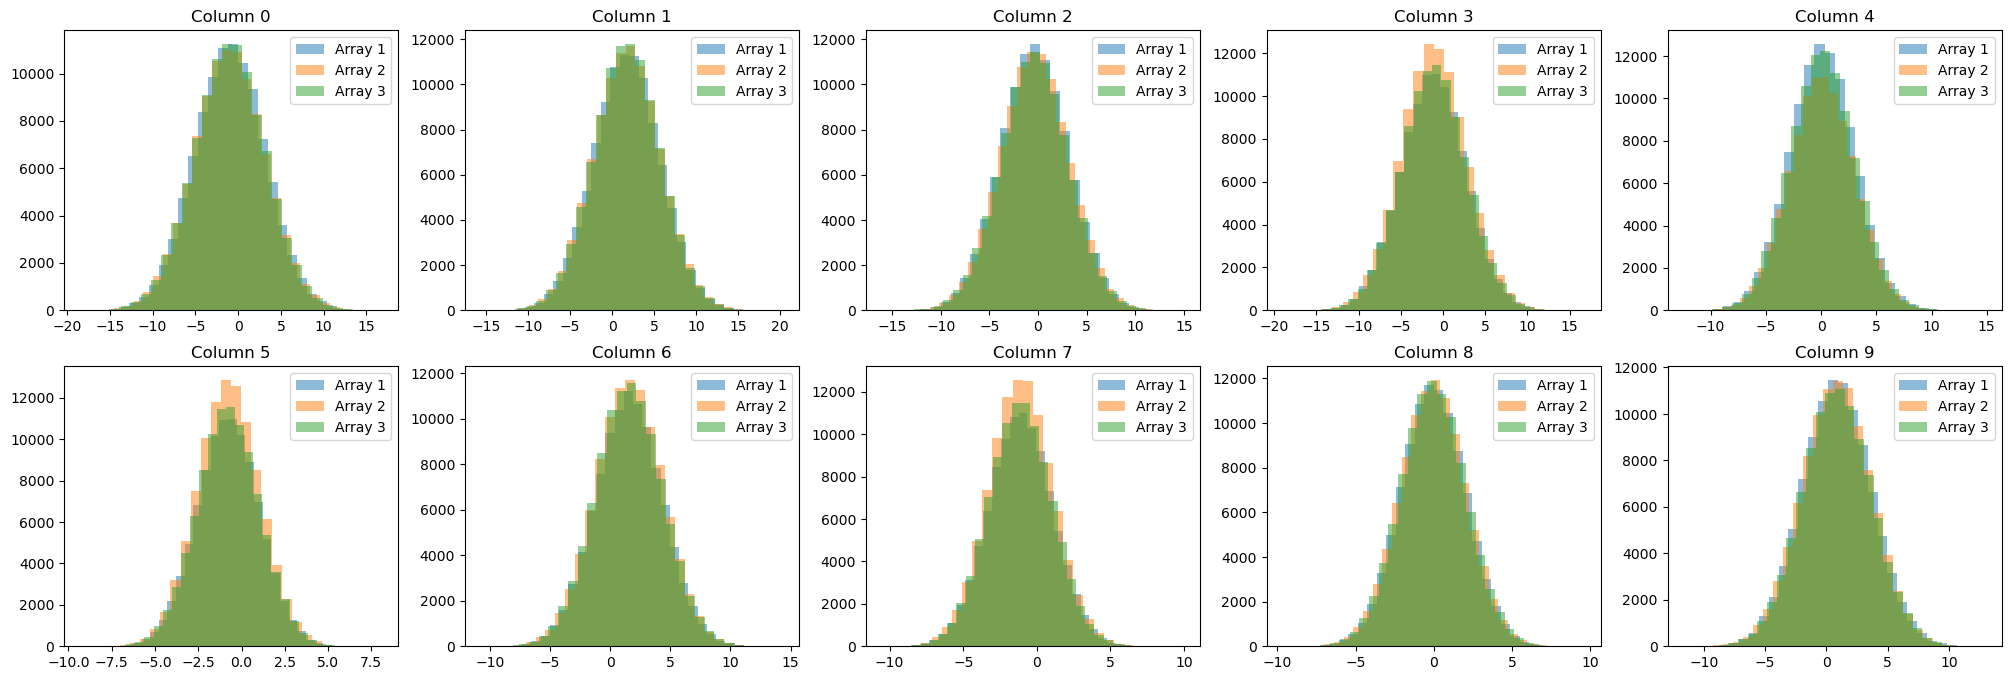

In [6]:
# Samples
n_samp = 100000
samp_sp = x_sp.rvs(size=n_samp)
samp_x1 = x1.sample(n_samp)
samp_x2 = x2.sample(n_samp)

hist_plt = get_col_hist_grid(samp_sp, samp_x1, samp_x2, bins=30, nrows=2)
plt.show()

In [7]:
# Density evaluations
dens_sp = x_sp.logpdf(samp_sp)
dens_x1 = x1.log_p(samp_sp)
dens_x2 = x2.log_p(samp_sp)

print(np.allclose(dens_sp, dens_x1))
print(np.allclose(dens_sp, dens_x2))

True
True


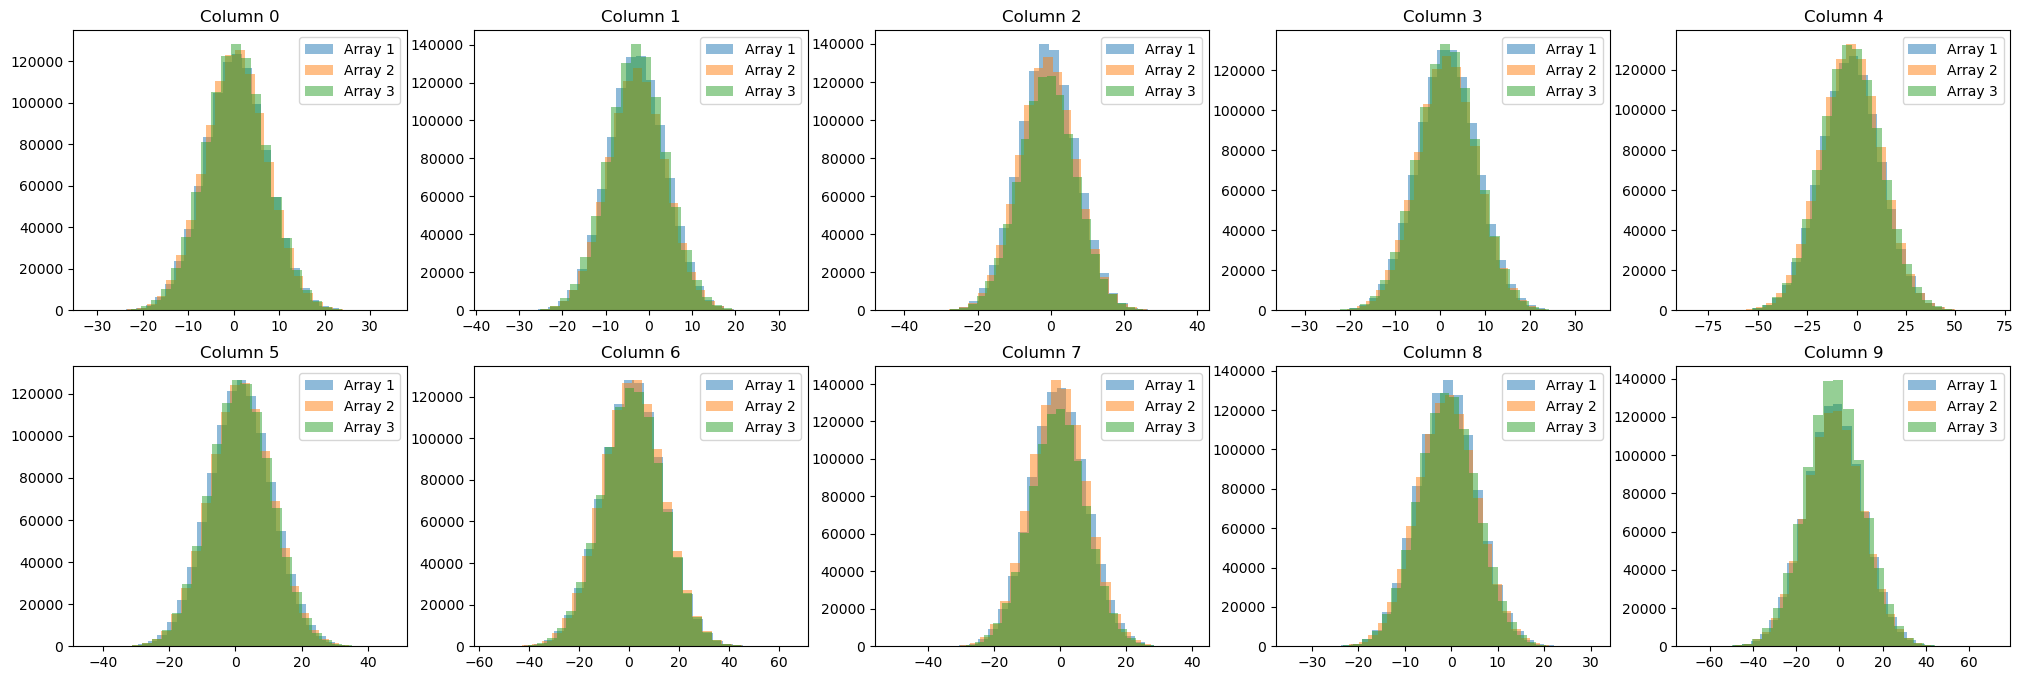

In [8]:
# Propagate through affine map.
n = 10
A = np.random.normal(size=(n, d))
b = np.random.normal(size=n)
F = lambda x: A @ x + b

y1 = x1.apply_affine_map(A,b)
y2 = x2.apply_affine_map(A,b)

n_samp = 1000000
samp_y1 = y1.sample(n_samp)
samp_y2 = y2.sample(n_samp)
samp_sp = x_sp.rvs(size=n_samp)
samp_y_sp = np.array([F(row) for row in samp_sp])

hist_plt_y = get_col_hist_grid(samp_y_sp, samp_y1, samp_y2, bins=30, nrows=2)
plt.show()

In [8]:
samp_sp.shape

(100000, 10)